# Business_Reviews_Modeling

# Importing required libraries for the project

In [1]:
import re
import string
import random
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
nltk.download("punkt")
nltk.download('wordnet')
from random import sample
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from collections import defaultdict
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

[nltk_data] Downloading package punkt to C:\Users\skills
[nltk_data]     11-10-21\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\skills
[nltk_data]     11-10-21\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Get the data

In [2]:
Business_Reviews_DF_ = pd.read_csv('Data\Business_Reviews(basis).pkl')

In [3]:
Business_Reviews_DF_.head()

,business_categories,business_city,business_id,business_name,business_stars,review_id,reviewer_name,stars,reviews,user_id
0,Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,Morning Glory Cafe,4,fWKvX83p0-ka4JS3dc6E5A,Jason,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q
1,Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,Spinato's Pizzeria,4,IjZ33sJrzXqU-0X6U8NwyA,Paul,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ
2,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,Haji-Baba,4,IESLBzqUCLdSzSqm0eCSxQ,Nicole,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg
3,Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,Chaparral Dog Park,4,G-WvGaISbqqaMHlNnByodA,lindsey,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg
4,Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,Discount Tire,4,1uJFq2r5QfJG_6ExMRCaGw,Roger,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw


In [4]:
Business_Reviews_DF = pd.read_csv('Data\Business_Reviews.pkl')

In [5]:
Business_Reviews_DF.head()

,sentiment,reviews,reviews_processed,Raw Length,tokenized
0,positive,My wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,155,"['wife', 'took', 'birthday', 'breakfast', 'exc..."
1,positive,I have no idea why some people give bad review...,idea people give bad reviews place goes show p...,257,"['idea', 'people', 'give', 'bad', 'reviews', '..."
2,positive,love the gyro plate. Rice is so good and I als...,love gyro plate rice good also dig candy selec...,16,"['love', 'gyro', 'plate', 'rice', 'good', 'als..."
3,positive,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota love chaparral dog park convenien...,76,"['rosie', 'dakota', 'love', 'chaparral', 'dog'..."
4,positive,General Manager Scott Petello is a good egg!!!...,general manager scott petello good egg go deta...,86,"['general', 'manager', 'scott', 'petello', 'go..."


# Visualization using WordCloud

In [9]:
# based on the rating score, the data was split into three parts
bad_reviews = Business_Reviews_DF[Business_Reviews_DF.sentiment=='positive']['reviews_processed']
good_reviews = Business_Reviews_DF[Business_Reviews_DF.sentiment=='negative']['reviews_processed']

# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# apply function above 
common_words_good = get_top_n_bigram(good_reviews, 30)
common_words_bad= get_top_n_bigram(bad_reviews, 30)

In [10]:
common_words_good[:10]

[('food', 28036),
 ('place', 24726),
 ('like', 23008),
 ('good', 20264),
 ('time', 15706),
 ('service', 15246),
 ('really', 12661),
 ('got', 10209),
 ('ordered', 9931),
 ('went', 9228)]

In [11]:
common_words_bad[:10]

[('place', 94729),
 ('good', 94404),
 ('great', 89194),
 ('food', 81197),
 ('like', 65280),
 ('time', 48425),
 ('really', 46571),
 ('service', 42273),
 ('love', 41430),
 ('best', 33870)]

C:\Users\skills 11-10-21\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skills 11-10-21\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


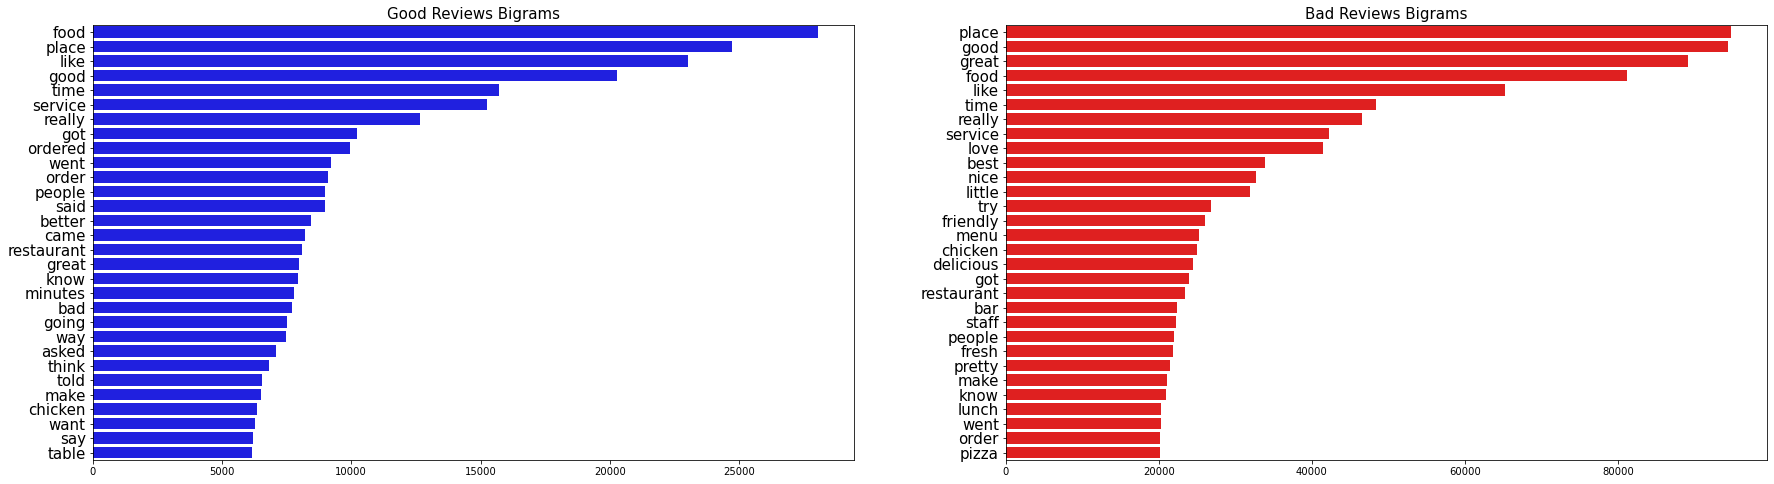

In [12]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

# bigram plot using function above
plt.figure(figsize=(30,8))

# good reviews bigrams
plt.subplot(1,2,1)
n_gram_plot(common_words_good,'Good','blue')


#bad reviews bigrams
plt.subplot(1,2,2)
n_gram_plot(common_words_bad,'Bad','r')
plt.show()

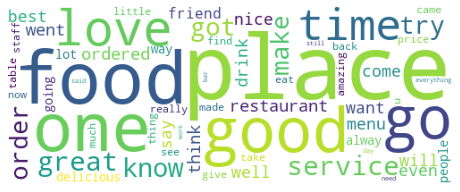

In [13]:
text=" ".join(Business_Reviews_DF['reviews'])
plt.rcParams['figure.figsize'] =8, 8
wordcloud = WordCloud(max_font_size=100, max_words=60, background_color="white",width=500, height=200).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [14]:
# a function to create a dictionary
def dictionary(data):
    dictionary={}
    for i in range(len(data)):
        dictionary[data[i][0]]=data[i][1]
    return dictionary

# obtain bigram data which is a list of tuples - for each part
common_words_good = get_top_n_bigram(good_reviews, 30)
common_words_bad= get_top_n_bigram(bad_reviews, 30)

# using function above convert a list of tuples into a dictionary type for each part 
good_re_dictionary=dictionary(common_words_good)
bad_re_dictionary=dictionary(common_words_bad)

# word cloud function
def Word_Cloud(dictionary):
    wordcloud = WordCloud(max_font_size=100, max_words=60, background_color="white",width=500, height=200).generate_from_frequencies(dictionary)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

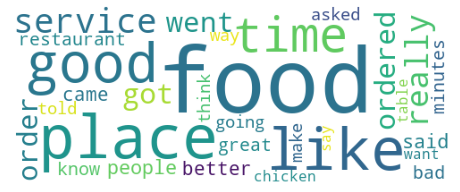

In [15]:
Word_Cloud(good_re_dictionary)

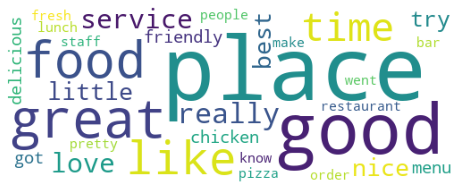

In [16]:
Word_Cloud(bad_re_dictionary)

# Content-based Recommender System

In [17]:
n_ratings = len(Business_Reviews_DF_)
n_business = len(Business_Reviews_DF_['business_id'].unique())
n_users = len(Business_Reviews_DF_['user_id'].unique())
  
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique business id's: {n_business}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per business: {round(n_ratings/n_business, 2)}")
  
user_freq = Business_Reviews_DF_[['user_id', 'business_id']].groupby('user_id').count().reset_index()
user_freq.columns = ['user_id', 'n_ratings']
user_freq.head()

# Find Lowest and Highest rated business:
mean_rating = Business_Reviews_DF_.groupby('business_id')[['stars']].mean()
# Lowest rated business
lowest_rated = mean_rating['stars'].idxmin()
Business_Reviews_DF_.loc[Business_Reviews_DF_['business_id'] == lowest_rated]
# Highest rated business
highest_rated = mean_rating['stars'].idxmax()
Business_Reviews_DF_.loc[Business_Reviews_DF_['business_id'] == highest_rated]
# show number of people who rated business rated business highest
Business_Reviews_DF_[Business_Reviews_DF_['business_id']==highest_rated]
# show number of people who rated business rated business lowest
Business_Reviews_DF_[Business_Reviews_DF_['business_id']==lowest_rated]
  
## the above business has very low dataset. We will use bayesian average
business_stats = Business_Reviews_DF_.groupby('business_id')[['stars']].agg(['count', 'mean'])
##business_stats.columns = Business_Reviews_DF_.columns.droplevel()


# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix
  
def create_matrix(df):
      
    N = len(Business_Reviews_DF_['user_id'].unique())
    M = len(Business_Reviews_DF_['business_id'].unique())
      # Map Ids to indices
    user_mapper = dict(zip(np.unique(Business_Reviews_DF_["user_id"]), list(range(N))))
    business_mapper = dict(zip(np.unique(Business_Reviews_DF_["business_id"]), list(range(M))))
      
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(Business_Reviews_DF_["user_id"])))
    business_inv_mapper = dict(zip(list(range(M)), np.unique(Business_Reviews_DF_["business_id"])))
      
    user_index = [user_mapper[i] for i in Business_Reviews_DF_['user_id']]
    business_index = [business_mapper[i] for i in Business_Reviews_DF_['business_id']]
  
    X = csr_matrix((Business_Reviews_DF_["stars"], (business_index, user_index)), shape=(M, N))
      
    return X, user_mapper, business_mapper, user_inv_mapper, business_inv_mapper
  
X, user_mapper, business_mapper, user_inv_mapper, business_inv_mapper = create_matrix(Business_Reviews_DF_.stars)
  
from sklearn.neighbors import NearestNeighbors
"""
Find similar business using KNN
"""
def find_similar_business(business_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    business_ind = business_mapper[business_id]
    business_vec = X[business_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    business_vec = business_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(business_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(business_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

Number of ratings: 215877
Number of unique business id's: 11535
Number of unique users: 43873
Average ratings per user: 4.92
Average ratings per business: 18.71


In [18]:
business_titles1 = dict(zip(Business_Reviews_DF_['business_id'], Business_Reviews_DF_['business_name']))
business_titles2 = dict(zip(Business_Reviews_DF_['business_id'], Business_Reviews_DF_['business_categories']))

business_id = '9yKzy9PApeiPPOUJEtnvkg'
print(f"\nThe business ID is: {business_id}")
similar_ids = find_similar_business(business_id, X, k=10)
business_title1 = business_titles1[business_id]
business_title2 = business_titles2[business_id]

  
print(f"\nThe business he chose is: {business_title1}")
print("\nThe recommended business is:")
for business in similar_ids:
    print(f"Business name is: {business_titles1[business]},\t\t\tAnd his classification is:{business_titles2[business]}")


The business ID is: 9yKzy9PApeiPPOUJEtnvkg

The business he chose is: Morning Glory Cafe

The recommended business is:
Business name is: Fry's Marketplace,			And his classification is: Grocery
Business name is: Salad Creations,			And his classification is: Restaurants
Business name is: Donut Central,			And his classification is: Donuts
Business name is: Lucy's Cafe & Grill,			And his classification is: Restaurants
Business name is: Tcf Bank,			And his classification is: Financial Services
Business name is: Target Stores,			And his classification is: Drugstores
Business name is: Latitude 30,			And his classification is: Restaurants
Business name is: Ruby Tuesday,			And his classification is: Restaurants
Business name is: CVS/pharmacy,			And his classification is: Pharmacy
Business name is: Grand Avenue Tavern,			And his classification is: Nightlife


In [19]:
business_titles1 = dict(zip(Business_Reviews_DF_['business_id'], Business_Reviews_DF_['business_name']))
business_titles2 = dict(zip(Business_Reviews_DF_['business_id'], Business_Reviews_DF_['business_categories']))

business_id = '_1QQZuf4zZOyFCvXc0o6Vg'
print(f"\nThe business ID is: {business_id}")
similar_ids = find_similar_business(business_id, X, k=10)
business_title1 = business_titles1[business_id]
business_title2 = business_titles2[business_id]

  
print(f"\nThe business he chose is: {business_title1}")
print("\nThe recommended business is:")
for business in similar_ids:
    print(f"Business name is: {business_titles1[business]},\t\t\tAnd his classification is:{business_titles2[business]}")



The business ID is: _1QQZuf4zZOyFCvXc0o6Vg

The business he chose is: Chaparral Dog Park

The recommended business is:
Business name is: Hottie World,			And his classification is: Accessories
Business name is: Men's Wearhouse   ,			And his classification is: Shopping
Business name is: Party City,			And his classification is: Event Planning & Services
Business name is: Andrews Party Rental,			And his classification is: Event Planning & Services
Business name is: Seville Cleaners,			And his classification is: Dry Cleaning & Laundry
Business name is: Scottsdale Gymnastics,			And his classification is: Fitness & Instruction
Business name is: Mardi Gras Costume Shop,			And his classification is: Wigs
Business name is: Fresh & Easy Neighborhood Market,			And his classification is: Grocery
Business name is: Wag N' Wash Healthy Pet Center,			And his classification is: Pets
Business name is: Water 'n Ice,			And his classification is: Ice Cream & Frozen Yogurt


# Topic Modeling

In [69]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [70]:
lemmatizer = WordNetLemmatizer()

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [71]:
clean_reviews = []

for review in tqdm(Business_Reviews_DF['reviews_processed']):
    
    #remove specific pos tag
    tokens = nltk.word_tokenize(review)
    tagged_sentence = nltk.tag.pos_tag(tokens)
    new_review = ' '.join([word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS' and tag != 'PRP' and tag != 'DT' and tag != 'NN' and tag != 'RB' and tag != 'NNS'])
    
    #remove named entity 
    document = nlp(new_review)
    new_review = " ".join([ent.text for ent in document if not ent.ent_type_ ])
    
    #apply lemmatizition
    newtext = ""
    tokens = word_tokenize(new_review)
    for token, tag in pos_tag(tokens):
        lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
        newtext += " " + lemma
    new_review = newtext
    
    #remove specific words 
    clean_reviews.append(" ".join([word for word in new_review.split() if word not in ['food']]))

100%|████████████████████████████████████████████████████████████████████████| 182972/182972 [1:07:27<00:00, 45.21it/s]


# Latent Semantic Analysis (LSA)

In [72]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic", ix)
        else:
            print("\nTopic:",topic_names[ix])
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [73]:
# Word Embedding - CountVectorizer and TF-IDF
cv = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(stop_words='english')

def embed(transformer, corpus):
    return transformer.fit_transform(corpus)

In [74]:
def LSA(transformer, corpus):
    lsa = TruncatedSVD(19)
    doc_topic = lsa.fit_transform(embed(transformer, corpus))
    
    print('Variance Ratio:')
    print(lsa.explained_variance_ratio_,'\n')
    
    print('Sum of Variance Ratio:',lsa.explained_variance_ratio_.sum(),'\n')
    
    print('Topics:')
    display_topics(lsa, transformer.get_feature_names(), 20)
    
    column_names = []
    for i in range(0,19):
        column_names.append('Topic_' + str(i))
     
    #if we want more details 
    #return pd.DataFrame(doc_topic.round(5),index = corpus,columns = column_names)

### - Original Plot with CountVectorizer

In [75]:
LSA(cv,Business_Reviews_DF['reviews_processed'])

Variance Ratio:
[0.03290335 0.01200455 0.01129921 0.01038307 0.00974385 0.00797216
 0.00780935 0.0066955  0.00568275 0.00556632 0.00528885 0.00486261
 0.00461464 0.00454655 0.00433114 0.00408953 0.0039674  0.0036466
 0.00355728] 

Sum of Variance Ratio: 0.14896470624544422 

Topics:

Topic 0
good, place, food, like, great, time, really, service, little, got, nice, love, restaurant, menu, ordered, order, chicken, try, people, best

Topic 1
food, good, chicken, restaurant, service, ordered, sauce, menu, rice, mexican, salad, meal, thai, delicious, fried, lunch, dish, beef, spicy, fresh

Topic 2
like, good, time, ordered, got, said, came, order, really, asked, minutes, chicken, sauce, know, cheese, told, went, table, salad, way

Topic 3
food, time, service, restaurant, minutes, order, great, said, table, asked, told, came, experience, took, server, wait, manager, went, ordered, know

Topic 4
place, food, like, mexican, eat, chinese, rice, people, chicken, places, thai, bad, order, know, a

### - Clean Plot with CountVectorizer

In [77]:
#clean_reviews
LSA(cv, clean_reviews)

Variance Ratio:
[0.05501705 0.02756323 0.02618725 0.01908933 0.01428945 0.01272193
 0.01030484 0.00904413 0.00877812 0.008186   0.00774378 0.00764936
 0.00721359 0.00694383 0.00665674 0.00635603 0.00596892 0.0057831
 0.00573742] 

Sum of Variance Ratio: 0.25123409250886763 

Topics:

Topic 0
good, like, great, make, come, say, want, little, know, look, nice, try, love, think, order, best, ask, fresh, delicious, new

Topic 1
like, say, come, make, want, know, ask, look, tell, think, need, wait, leave, walk, new, sure, bad, little, order, table

Topic 2
great, love, make, best, happy, delicious, awesome, friendly, nice, new, favorite, recommend, fresh, amaze, fantastic, wonderful, perfect, amazing, little, enjoy

Topic 3
like, great, good, taste, feel, cool, cheap, frozen, felt, smell, crowd, atmosphere, dive, awesome, hang, modern, love, real, kinda, shit

Topic 4
make, fresh, love, best, sure, delicious, little, try, favorite, cheese, perfect, sweet, hot, serve, new, know, amaze, local

# Data Splitting
Split a sample of the data into 80%, 20%, and 20% splits for training, validation, and testing respectively.

In [20]:
sub_Business_Reviews_DF = Business_Reviews_DF.sample(20000)#182354

In [21]:
# Split the data into X and y data sets
X = sub_Business_Reviews_DF.reviews_processed
y = sub_Business_Reviews_DF.sentiment

In [22]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.80, random_state=42, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.20, random_state=42, shuffle=True)

## CountVectorizer

In [23]:
cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_valid_cv1  = cv1.transform(X_valid)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aa,aaa,aaaaand,aaaah,aaaamazing,aaaarrrrrrrggggh,aaah,aaahhh,aaammaziiiing,aaand,...,zushi,zuzana,zuzu,zuzzu,zweigelt,zx,zy,zz,zzed,zzzzzip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## - Model metrics
Calculate accuracy, f1, recall, precision, and error rate from the passed true values and predicted values.

In [24]:
def print_all_metrics(y, y_pred):
    print(f'Accuracy:\t\t{accuracy_score(y, y_pred) * 100}')
    print(f'F1 Score:\t\t{f1_score(y, y_pred, average="weighted") * 100}')
    print(f'Recall Score:\t\t{recall_score(y, y_pred, average="weighted") * 100}')
    print(f'Precision Score:\t{precision_score(y, y_pred, average="weighted") * 100}')
    print(f'Error Rate:\t\t{(1 - accuracy_score(y, y_pred)) * 100}')

Plot a confusion matrix of the passed true values and predicted values.

In [25]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results
    #plt.savefig('images/confusion_matrix.png', transparent=True, bbox_inches='tight')

### Try classifying using Logistic Regression with CountVectorizer

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_cv1, y_train)

print('Training')
print_all_metrics(y_train, log_reg.predict(X_train_cv1))
print('\nValidation')
print_all_metrics(y_valid, log_reg.predict(X_valid_cv1))

C:\Users\skills 11-10-21\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training
Accuracy:		99.2625
F1 Score:		99.25803605623913
Recall Score:		99.2625
Precision Score:	99.26558195858767
Error Rate:		0.737500000000002

Validation
Accuracy:		91.65625
F1 Score:		91.38397861034318
Recall Score:		91.65625
Precision Score:	91.39527440265712
Error Rate:		8.343750000000005


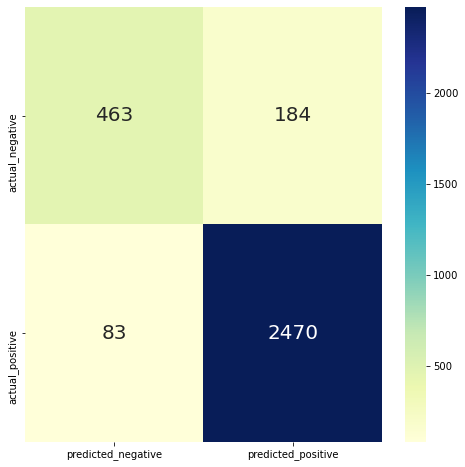

In [27]:
# The heat map for the first logistic regression model
cm1=conf_matrix(y_valid, log_reg.predict(X_valid_cv1))

### Try using TF-IDF instead of Count Vectorizer

In [28]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_valid_tfidf1  = tfidf1.transform(X_valid)

# unigram , binary gram
tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_valid_tfidf2  = tfidf2.transform(X_valid)

In [29]:
# Fit the first logistic regression on the TF-IDF data
log_reg.fit(X_train_tfidf1, y_train)

print('Training')
print_all_metrics(y_train, log_reg.predict(X_train_tfidf1))
print('\nValidation')
print_all_metrics(y_valid, log_reg.predict(X_valid_tfidf1))

Training
Accuracy:		93.575
F1 Score:		93.14082361110378
Recall Score:		93.575
Precision Score:	93.81726387161238
Error Rate:		6.4250000000000025

Validation
Accuracy:		90.28125
F1 Score:		89.29982300516409
Recall Score:		90.28125
Precision Score:	90.55919780927834
Error Rate:		9.718749999999998


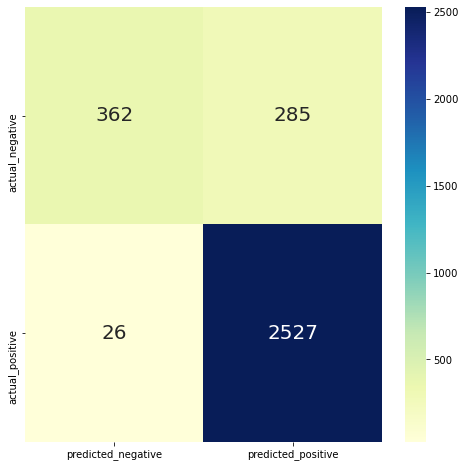

In [30]:
# Fit the first logistic regression on the TF-IDF data
cm2=conf_matrix(y_valid, log_reg.predict(X_valid_tfidf1))

In [31]:
# Fit the second logistic regression on the TF-IDF data
log_reg.fit(X_train_tfidf2, y_train)

print('Training')
print_all_metrics(y_train, log_reg.predict(X_train_tfidf2))
print('\nValidation')
print_all_metrics(y_valid, log_reg.predict(X_valid_tfidf2))

Training
Accuracy:		90.43124999999999
F1 Score:		89.16562667777852
Recall Score:		90.43124999999999
Precision Score:	91.40216650226685
Error Rate:		9.568750000000003

Validation
Accuracy:		88.03125
F1 Score:		86.23444481866322
Recall Score:		88.03125
Precision Score:	88.70712610375276
Error Rate:		11.968749999999995


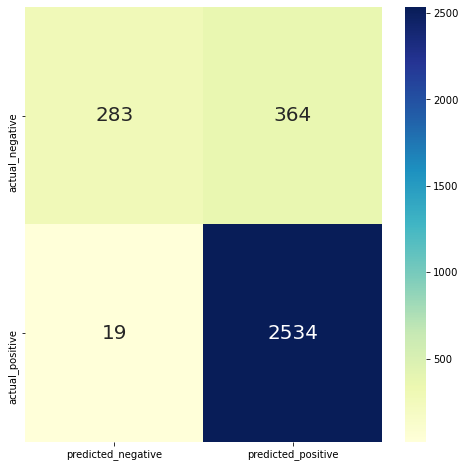

In [32]:
# Fit the secound logistic regression on the TF-IDF data
cm3=conf_matrix(y_valid, log_reg.predict(X_valid_tfidf2))

In [33]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm1, cm2, cm3)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LogReg1','LogReg1-TFIDF', 'LogReg2-TFIDF']
results_tf

#results = pd.concat([results, results_tf], axis=1)
#results

#LogReg1, LogReg2, NB1, NB2 ------> CountVectorizer
#LR1-TFIDF, LR2-TFIDF, NB1-TFIDF, NB2-TFIDF------> TFIDF

,LogReg1,LogReg1-TFIDF,LogReg2-TFIDF
Accuracy,0.917,0.903,0.880
Precision,0.931,0.899,0.874
Recall,0.967,0.990,0.993
F1 Score,0.949,0.942,0.930


# Testing

###  TF-IDF instead of Count Vectorizer

In [34]:
X_train_valid = pd.concat([X_train, X_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [64]:
tfidf1 = TfidfVectorizer(stop_words='english')
X_valid_tfidf1 = tfidf1.fit_transform(X_train_valid)
X_test_tfidf1  = tfidf1.transform(X_test)

In [67]:
# Fit the first logistic regression on the TF-IDF data
log_reg.fit(X_test_tfidf1, y_test)

print('Testing')
print_all_metrics(y_test, log_reg.predict(X_test_tfidf1))


Testing
Accuracy:		93.575
F1 Score:		93.14082361110378
Recall Score:		93.575
Precision Score:	93.81726387161238
Error Rate:		6.4250000000000025


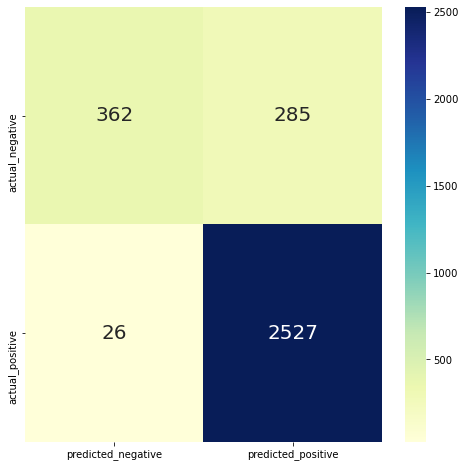

In [68]:
# Fit the first logistic regression on the TF-IDF data
#cm4=conf_matrix(y_test, log_reg.predict(X_test_tfidf1))
cm4=conf_matrix(y_test, log_reg.predict(X_test_tfidf1))